In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

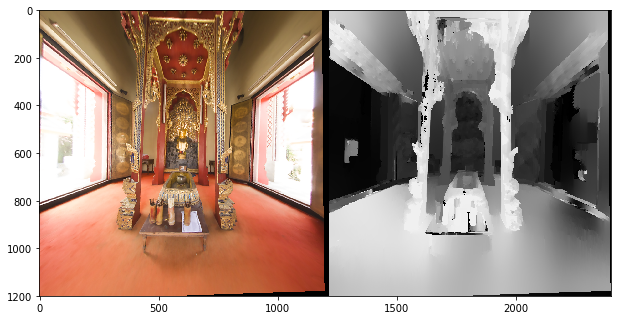

In [5]:
plt.style.use({'figure.figsize': (10.24, 5.76)})

rgbImg = cv2.imread( "imgL.png" )
depthImg = cv2.imread( "filteredDisp.png" )
combImg = np.hstack( ( rgbImg, depthImg ) )
cv2.imwrite( "combination.png", combImg )

plt.imshow( cv2.cvtColor( combImg, cv2.COLOR_BGR2RGB ) )

In [2]:
# 左右から見た色画像を使った、各Quilt画像を読み込む
imgL = cv2.imread( "reImageCompositWithR_Quilt.jpg" )
imgR = cv2.imread( "reImageCompositWithL_Quilt.jpg" )

# 念のため、画像サイズを確認
# 縦方向は355 x 10 = 3550, 横方向は 355 x 6 = 2130 
print(imgL.shape)
print(imgR.shape)

(3550, 2130, 3)
(3550, 2130, 3)


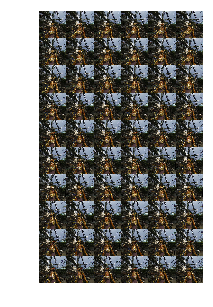

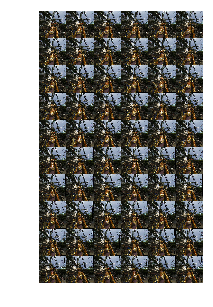

In [3]:
# 左から見た色画像を使ったQuilt画像
plt.figure( figsize = ( 5, 5 ) )
plt.axis( "off" )
plt.imshow( cv2.cvtColor( imgL, cv2.COLOR_BGR2RGB ) )

# 右から見た色画像を使ったQuilt画像
plt.figure( figsize = ( 5, 5 ) )
plt.axis( "off" )
plt.imshow( cv2.cvtColor( imgR, cv2.COLOR_BGR2RGB ) )

In [4]:
# 左右から見た各色画像から、観察方向ごとに「色」の
# 重み付け量を変えたQuilt画像を作り直す
# （そのQuilt画像を格納するための配列を用意する）

LRcompositImage = np.zeros_like( imgL )

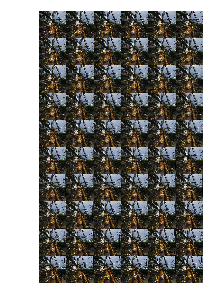

In [15]:
#   左Quilt画像に対する重み付け量
# （右Qilt画像の重み付け量は 1-alpha ）
alpha = 1.0

# 重み付け量を変化させながら（左重視→右重視）、
# 左右2枚のQuilt画像を合成する
for y in range(10):   # 縦方向
    for x in range(6): # 横方向
        # 355 x 355 の（観察方向に応じた）各小画像に対して、重み付け量
        # を使いつつ、左右のQuilt画像を合成する（なんてPythonは楽なんだ！）
        LRcompositImage[ y*355 : y*355+355, x*355 : x*355+355]  \
             =            alpha     * imgL[ y*355 : y*355+355, x*355 : x*355+355 ] \
                 + (1.0 - alpha ) * imgR[ y*355 : y*355+355, x*355 : x*355+355 ] 
        # 重み付け量を変化させる
        alpha = alpha - 1.0/60.0

# 合成作成したQuilt画像を眺める
plt.figure( figsize = ( 5, 5 ) )
plt.axis("off")
plt.imshow( cv2.cvtColor( LRcompositImage, cv2.COLOR_BGR2RGB ) )

In [16]:
cv2.imwrite("LRcompositImage.png", LRcompositImage)

True